# Importing the data

In [737]:
import pandas as pd
import numpy as np

def read_data(fileid): 
    stringvariables=["LOAN_ID","CHANNEL", "FIRST_TIME_HOME_BUYER_IND",
                  "LOAN_PURPOSE", "PROPERTY_TYPE", "OCCUPANCY_STATUS",
                  "PROPERTY_STATE", "ZIP_CODE_SHORT"]
    floatvariables=["NUMBER_OF_UNITS","FORECLOSURE","LTV",
                   "NUMBER_OF_BORROWERS","DTI","LOAN_AGE",
                   "REM_MONTHS_LEGAL_MATURITY", "REM_MONTHS_MATURITY",
                   "ORIGINAL_LOAN_TERM", "CLTV",
                   "B_CREDIT_SCORE_O","CB_CREDIT_SCORE_O", "NMONTHS",
                   "MSA","MORTGAGE_INSURANCE_PERCENTAGE",
                   "ORIGINAL_INTEREST_RATE", "CURRENT_INTEREST_RATE",
                   "ORIGINAL_UPB"]
    datevariables=["MONTHLY_REPORTING_PERIOD",
                   "ORIGINATION_DATE",
                   "FIRST_PAYMENT_DATE",
                   "MATURITY_DATE"]
    objectvariables=stringvariables + datevariables
    dtypes={}
    for s in objectvariables:
        dtypes[s]="object"
    for s in floatvariables:
        dtypes[s]="float"
    na_strings=["".join([" " for j in range(m)]) for m in range(10)]
    df=pd.read_csv(fileid,dtype=dtypes,na_values=na_strings)
    for datevar in datevariables:
        df[datevar]=pd.to_datetime(df[datevar],format="%m%Y")
    return(df)

In [738]:
#Reading the train data into dataframe
df1=read_data('trainAPTE.csv')
train_df=df1.copy()

In [739]:
y=train_df.loc[:,['FORECLOSURE','NMONTHS']]

In [740]:
train_df.drop(['FORECLOSURE','NMONTHS'],axis=1,inplace=True)

In [741]:
number_foreclosures=(y['FORECLOSURE']==1).sum()
print('Number of foreclosures in the training set are',number_foreclosures)

Number of foreclosures in the training set are 7399


In [742]:
mean_nmonths=y['NMONTHS'].mean()
print('Mean value of NMONTHS in the training set is {:.3f}'.format(mean_nmonths))

Mean value of NMONTHS in the training set is 60.772


# Inspecting the data

In [743]:
train_df.shape,y.shape

((250000, 28), (250000, 2))

In [744]:
#Data types of all columns
train_df.dtypes

LOAN_ID                                  object
MONTHLY_REPORTING_PERIOD         datetime64[ns]
CHANNEL                                  object
ORIGINAL_INTEREST_RATE                  float64
CURRENT_INTEREST_RATE                   float64
ORIGINAL_UPB                            float64
ORIGINAL_LOAN_TERM                      float64
ORIGINATION_DATE                 datetime64[ns]
FIRST_PAYMENT_DATE               datetime64[ns]
LOAN_AGE                                float64
REM_MONTHS_LEGAL_MATURITY               float64
REM_MONTHS_MATURITY                     float64
MATURITY_DATE                    datetime64[ns]
LTV                                     float64
CLTV                                    float64
NUMBER_OF_BORROWERS                     float64
DTI                                     float64
B_CREDIT_SCORE_O                        float64
CB_CREDIT_SCORE_O                       float64
FIRST_TIME_HOME_BUYER_IND                object
LOAN_PURPOSE                            

In [745]:
#General description of the numeric data
train_df.describe()

,ORIGINAL_INTEREST_RATE,CURRENT_INTEREST_RATE,ORIGINAL_UPB,ORIGINAL_LOAN_TERM,LOAN_AGE,REM_MONTHS_LEGAL_MATURITY,REM_MONTHS_MATURITY,LTV,CLTV,NUMBER_OF_BORROWERS,DTI,B_CREDIT_SCORE_O,CB_CREDIT_SCORE_O,NUMBER_OF_UNITS,MSA,MORTGAGE_INSURANCE_PERCENTAGE
count,250000.000000,249996.000000,250000.000000,250000.000000,249996.000000,249996.000000,249996.000000,250000.000000,246825.000000,249911.000000,241209.000000,248300.000000,114506.000000,250000.000000,250000.000000,41999.000000
mean,6.206449,6.206450,158896.052000,306.794856,0.558149,306.235856,305.415391,69.442732,70.224742,1.617612,34.024352,726.042175,733.731010,1.041412,27037.665720,22.829829
std,0.824314,0.824321,83222.389816,82.024687,1.568314,82.021823,82.222904,17.419863,17.688648,0.504134,12.942940,56.277771,54.671193,0.260049,14068.680452,7.119979
min,2.990000,2.990000,5000.000000,60.000000,-1.000000,60.000000,1.000000,2.000000,2.000000,1.000000,1.000000,363.000000,359.000000,1.000000,0.000000,1.000000
25%,5.625000,5.625000,97000.000000,180.000000,0.000000,181.000000,180.000000,59.000000,60.000000,1.000000,24.000000,687.000000,697.000000,1.000000,16980.000000,17.000000
50%,6.125000,6.125000,143000.000000,360.000000,0.000000,359.000000,359.000000,74.000000,75.000000,2.000000,33.000000,735.000000,745.000000,1.000000,31080.000000,25.000000
75%,6.750000,6.750000,206000.000000,360.000000,1.000000,360.000000,360.000000,80.000000,80.000000,2.000000,43.000000,772.000000,778.000000,1.000000,38860.000000,30.000000
max,11.750000,11.750000,802000.000000,360.000000,92.000000,361.000000,361.000000,97.000000,192.000000,9.000000,64.000000,850.000000,839.000000,4.000000,49740.000000,50.000000


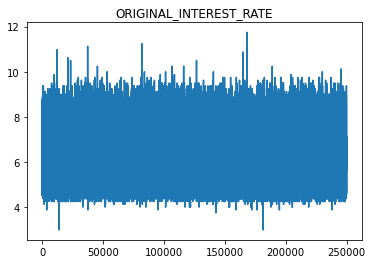

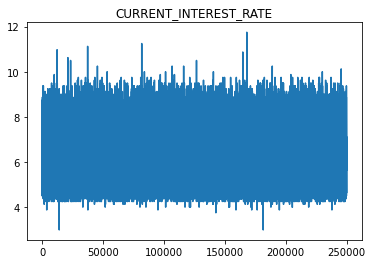

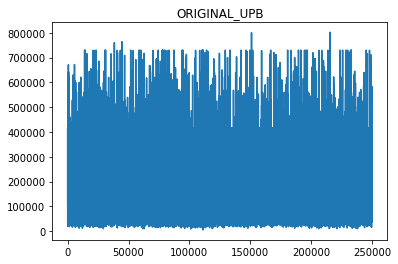

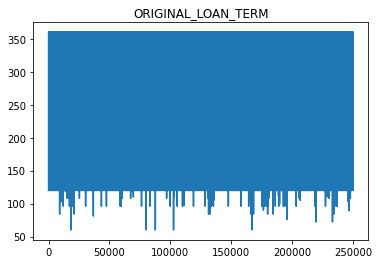

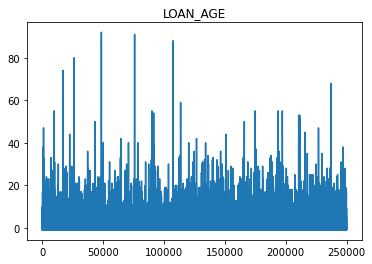

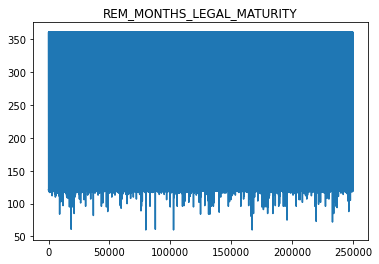

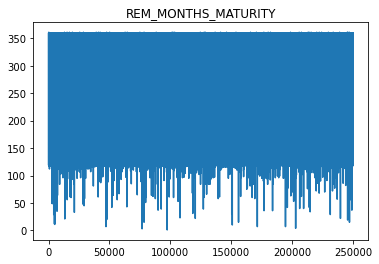

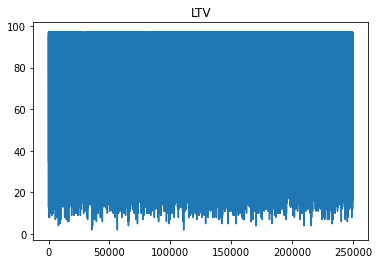

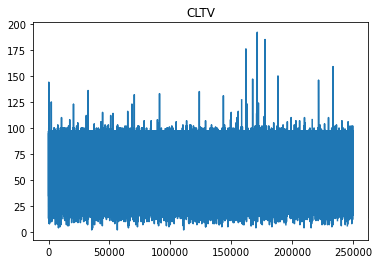

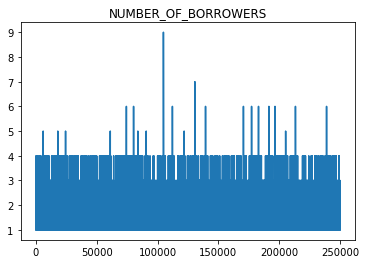

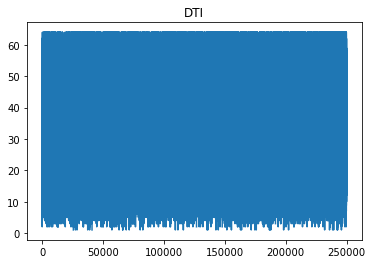

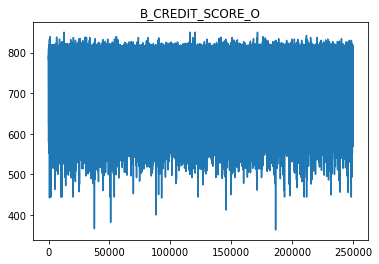

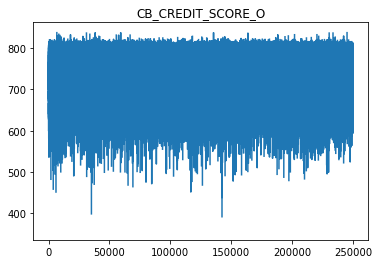

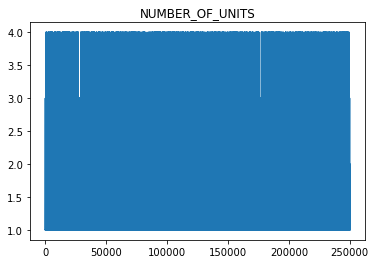

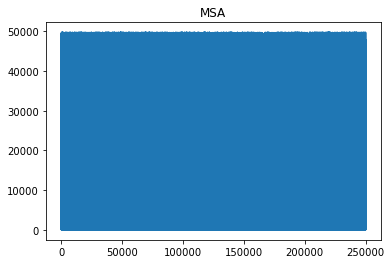

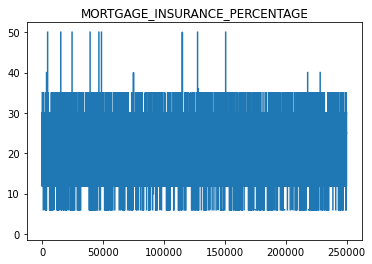

In [746]:
#Plotting all numeric predictors to inspect for outliers
import matplotlib.pyplot as plt
for col in train_df.columns:
    if(train_df[col].dtype==float):
        plt.figure()
        plt.plot(train_df[col])
        plt.title(col)

- As we can see from the above plots, there are no extreme outliers in any of the numeric features

# Dealing with missing data

In [747]:
#Finding the number of null values for all features where null values exist
for col in train_df.columns:
    if(train_df[col].isnull().sum()>0):
        print(col,train_df[col].isnull().sum())

CURRENT_INTEREST_RATE 4
LOAN_AGE 4
REM_MONTHS_LEGAL_MATURITY 4
REM_MONTHS_MATURITY 4
MATURITY_DATE 4
CLTV 3175
NUMBER_OF_BORROWERS 89
DTI 8791
B_CREDIT_SCORE_O 1700
CB_CREDIT_SCORE_O 135494
FIRST_TIME_HOME_BUYER_IND 193
MORTGAGE_INSURANCE_PERCENTAGE 208001


### Deleting variables

- CB_CREDIT_SCORE and MORTGAGE_INSURANCE_PERCENTAGE have a majority of their values missing, i.e. more than half of their values are missing
- Any sort of imputation method would not do justice to these variables
- Hence, deleting these two columns

In [748]:
train_df.drop(['CB_CREDIT_SCORE_O','MORTGAGE_INSURANCE_PERCENTAGE'],axis=1,inplace=True)

### Deleting missing values

In [749]:
train_df.loc[train_df['CURRENT_INTEREST_RATE'].isna()][['CURRENT_INTEREST_RATE','LOAN_AGE','REM_MONTHS_MATURITY','REM_MONTHS_LEGAL_MATURITY','MATURITY_DATE']]

,CURRENT_INTEREST_RATE,LOAN_AGE,REM_MONTHS_MATURITY,REM_MONTHS_LEGAL_MATURITY,MATURITY_DATE
48055,NaN,NaN,NaN,NaN,NaT
51870,NaN,NaN,NaN,NaN,NaT
176994,NaN,NaN,NaN,NaN,NaT
215087,NaN,NaN,NaN,NaN,NaT


In [750]:
y.loc[y['NMONTHS']==1]

,FORECLOSURE,NMONTHS
48055,0.0,1.0
51870,0.0,1.0
176994,0.0,1.0
215087,0.0,1.0


- As we can see here, the data points for which these 5 above mentioned features are null are the same data points.
- A further observation can be made that these values occur exactly wherever NMONTHS=1.
- Hence, deleting all these 4 data points.

In [751]:
train_df.drop(y.loc[y['NMONTHS']==1].index,inplace=True)
y.drop(y.loc[y['NMONTHS']==1].index,inplace=True)

In [752]:
train_df.loc[(train_df['NUMBER_OF_BORROWERS'].isna()) | (train_df['FIRST_TIME_HOME_BUYER_IND'].isna())]

,LOAN_ID,MONTHLY_REPORTING_PERIOD,CHANNEL,ORIGINAL_INTEREST_RATE,CURRENT_INTEREST_RATE,ORIGINAL_UPB,ORIGINAL_LOAN_TERM,ORIGINATION_DATE,FIRST_PAYMENT_DATE,LOAN_AGE,...,DTI,B_CREDIT_SCORE_O,FIRST_TIME_HOME_BUYER_IND,LOAN_PURPOSE,PROPERTY_TYPE,NUMBER_OF_UNITS,OCCUPANCY_STATUS,PROPERTY_STATE,MSA,ZIP_CODE_SHORT
1465,IHBHJAFBBEBH,2000-12-01,B,8.375,8.375,72000.0,360.0,2000-10-01,2000-12-01,1.0,...,35.0,749.0,NaN,P,SF,1.0,P,KY,30460.0,405
2683,HJIHHDBHJAEJ,2006-09-01,R,6.750,6.750,108000.0,360.0,2006-08-01,2006-10-01,0.0,...,24.0,727.0,NaN,P,SF,1.0,I,CO,22660.0,805
2947,HDFECGHCEEHD,2001-08-01,R,7.250,7.250,128000.0,360.0,2001-05-01,2001-07-01,2.0,...,9.0,774.0,NaN,P,SF,1.0,P,CA,0.0,949
3288,DGCBEECEBAFH,2003-01-01,R,6.125,6.125,280000.0,360.0,2002-11-01,2003-01-01,1.0,...,NaN,779.0,N,C,SF,1.0,P,MA,14460.0,018
3542,FBEHDDDFIDCJ,2003-05-01,R,6.250,6.250,245000.0,360.0,2003-05-01,2003-07-01,-1.0,...,29.0,705.0,NaN,P,SF,1.0,I,CA,31100.0,913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244537,JDFFAIIAHHHF,2003-08-01,R,5.250,5.250,297000.0,360.0,2003-07-01,2003-09-01,0.0,...,32.0,687.0,NaN,R,SF,1.0,P,MD,12580.0,214
246539,EFFJDGCAEIAA,2003-07-01,R,4.875,4.875,50000.0,180.0,2003-06-01,2003-08-01,0.0,...,40.0,779.0,NaN,P,SF,1.0,I,SC,17900.0,292
246856,FGIJFEJIFHEH,2008-08-01,B,5.750,5.750,416000.0,360.0,2008-04-01,2008-06-01,3.0,...,60.0,750.0,NaN,C,SF,1.0,P,CA,37100.0,930
247013,GHHJJIDEIDFC,2001-12-01,R,6.250,6.250,98000.0,180.0,2001-05-01,2001-07-01,6.0,...,NaN,780.0,N,R,SF,1.0,P,PA,38300.0,160


- We can see that rows having null values in NUMBER_OF_BORROWERS or in FIRST_TIME_HOME_BUYER_IND are a total of 250, which is just 0.1% of the data points, i.e. a very insignificant amount.
- Also, these values seem to be missing randomly, probably due to some human error.
- Hence, deleting all these data points too.

In [753]:
remove_index=train_df.loc[(train_df['NUMBER_OF_BORROWERS'].isna()) | (train_df['FIRST_TIME_HOME_BUYER_IND'].isna())].index
train_df.drop(remove_index,inplace=True)
y.drop(remove_index,inplace=True)

In [754]:
train_df.shape, y.shape

((249746, 26), (249746, 2))

### Imputing missing values

In [755]:
#Finding the number of null values for all features where null values exist
for col in train_df.columns:
    if(train_df[col].isnull().sum()>0):
        print(col,train_df[col].isnull().sum())

CLTV 3169
DTI 8677
B_CREDIT_SCORE_O 1668


- The number of data points having null values in the above given features are too high to delete those data points. 
- Hence, various imputation methods are used for these features

- Starting with CLTV (Combined Loan To Value), this value defines a ratio of all combined loan values to the value of the property.
- It is a generalized case of LTV (Loan To Value), wherein the number of loans taken by the individual is more than 1.
- Whenever an individual has only one loan, it does not make sense to have a CLTV ratio for them. 
- This is probably why 3169 values for CLTV are null. They could be for the individuals who have taken only one loan.
- Mathematically, for people who have taken only one loan, the value of LTV is equal to the value of CLTV.
- Also, looking at the statistical measures of LTV and CLTV, they are very similar to each other.
- Hence, replacing all the null values of CLTV with the corresponding LTV values

In [756]:
CLTV_null_index=train_df.loc[train_df['CLTV'].isna()].index
train_df.loc[CLTV_null_index][['LTV','CLTV']]

,LTV,CLTV
168,68.0,NaN
300,61.0,NaN
462,95.0,NaN
466,90.0,NaN
685,77.0,NaN
...,...,...
249440,97.0,NaN
249491,95.0,NaN
249526,74.0,NaN
249680,90.0,NaN


In [757]:
train_df['CLTV'].fillna(train_df['LTV'],inplace=True)
train_df.loc[CLTV_null_index][['LTV','CLTV']]

,LTV,CLTV
168,68.0,68.0
300,61.0,61.0
462,95.0,95.0
466,90.0,90.0
685,77.0,77.0
...,...,...
249440,97.0,97.0
249491,95.0,95.0
249526,74.0,74.0
249680,90.0,90.0


- Filling up the null values in DTI and B_CREDIT_SCORE_O with their median values

In [758]:
DTI_null_index=train_df.loc[train_df['DTI'].isna()].index
train_df.loc[DTI_null_index][['DTI']]

,DTI
101,NaN
113,NaN
123,NaN
139,NaN
197,NaN
...,...
249859,NaN
249865,NaN
249924,NaN
249966,NaN


In [759]:
train_df['DTI'].fillna(train_df['DTI'].median(),inplace=True)
train_df.loc[DTI_null_index][['DTI']]

,DTI
101,33.0
113,33.0
123,33.0
139,33.0
197,33.0
...,...
249859,33.0
249865,33.0
249924,33.0
249966,33.0


In [760]:
B_CREDIT_SCORE_O_null_index=train_df.loc[train_df['B_CREDIT_SCORE_O'].isna()].index
train_df.loc[B_CREDIT_SCORE_O_null_index][['B_CREDIT_SCORE_O']]

,B_CREDIT_SCORE_O
110,NaN
132,NaN
155,NaN
208,NaN
631,NaN
...,...
249371,NaN
249490,NaN
249619,NaN
249677,NaN


In [761]:
train_df['B_CREDIT_SCORE_O'].fillna(train_df['B_CREDIT_SCORE_O'].median(),inplace=True)
train_df.loc[B_CREDIT_SCORE_O_null_index][['B_CREDIT_SCORE_O']]

,B_CREDIT_SCORE_O
110,735.0
132,735.0
155,735.0
208,735.0
631,735.0
...,...
249371,735.0
249490,735.0
249619,735.0
249677,735.0


# Datetime variables

In [762]:
#Converting the 4 date_time columns into additional numerical year and month values
train_df['MRP_m']=train_df['MONTHLY_REPORTING_PERIOD'].apply(lambda x:x.month)
train_df['MRP_y']=train_df['MONTHLY_REPORTING_PERIOD'].apply(lambda x:x.year)
train_df['OD_m']=train_df['ORIGINATION_DATE'].apply(lambda x:x.month)
train_df['OD_y']=train_df['ORIGINATION_DATE'].apply(lambda x:x.year)
train_df['FPD_m']=train_df['FIRST_PAYMENT_DATE'].apply(lambda x:x.month)
train_df['FPD_y']=train_df['FIRST_PAYMENT_DATE'].apply(lambda x:x.year)
train_df['MD_m']=train_df['MATURITY_DATE'].apply(lambda x:x.month)
train_df['MD_y']=train_df['MATURITY_DATE'].apply(lambda x:x.year)

In [763]:
#Dropping the original date columns
train_df.drop(['MONTHLY_REPORTING_PERIOD','ORIGINATION_DATE','FIRST_PAYMENT_DATE','MATURITY_DATE'],axis=1,inplace=True)

In [764]:
#Printing different years/months in all datetime features and their respective frequencies
for col in ['MRP_m','MRP_y','OD_m','OD_y','FPD_m','FPD_y','MD_m','MD_y']:
    print(train_df[col].value_counts())

9     22975
5     21972
6     21952
4     21711
7     21432
8     21115
12    20737
1     20390
10    19905
11    19835
2     19107
3     18615
Name: MRP_m, dtype: int64
2003    68051
2002    41680
2001    32713
2004    23261
2008    20637
2005    19160
2007    16673
2006    14586
2000    12765
2009      220
Name: MRP_y, dtype: int64
4     23231
3     22243
7     21910
8     21897
6     21629
10    21545
5     21396
12    20300
11    20117
9     19070
2     18767
1     17641
Name: OD_m, dtype: int64
2003    61958
2002    44617
2001    36912
2004    22435
2005    18830
2008    18581
2007    16987
2006    14417
2000    13369
1999     1640
Name: OD_y, dtype: int64
6     23254
5     22441
9     22038
8     21534
10    21489
12    21402
7     21322
1     20108
2     20039
11    19540
4     18768
3     17811
Name: FPD_m, dtype: int64
2003    69430
2002    41590
2001    31077
2004    23303
2008    20433
2005    19546
2007    16150
2006    14509
2000    12011
2009     1321
1999      376
Name: 

In [765]:
#Deleting those data points whose MD_y is 2009, 2008 or 2007
MD_remove_index=train_df.loc[(train_df['MD_y']==2009) | (train_df['MD_y']==2008) | (train_df['MD_y']==2007)].index
train_df.drop(MD_remove_index,inplace=True)
y.drop(MD_remove_index,inplace=True)

In [766]:
#Treating the months and years columns as categorical data and converting them to dummy/indicator variables
mrp_m_dummies=pd.get_dummies(train_df['MRP_m'],drop_first=True,prefix='mrp_m')
mrp_y_dummies=pd.get_dummies(train_df['MRP_y'],drop_first=True,prefix='mrp_y')
od_m_dummies=pd.get_dummies(train_df['OD_m'],drop_first=True,prefix='od_m')
od_y_dummies=pd.get_dummies(train_df['OD_y'],drop_first=True,prefix='od_y')
fpd_m_dummies=pd.get_dummies(train_df['FPD_m'],drop_first=True,prefix='fpd_m')
fpd_y_dummies=pd.get_dummies(train_df['FPD_y'],drop_first=True,prefix='fpd_y')
md_m_dummies=pd.get_dummies(train_df['MD_m'],drop_first=True,prefix='md_m')
md_y_dummies=pd.get_dummies(train_df['MD_y'],drop_first=True,prefix='md_y')

In [767]:
#Adding all the indicator variables to the dataframe
train_df=pd.concat([train_df,mrp_m_dummies,mrp_y_dummies,od_m_dummies,od_y_dummies,fpd_m_dummies,fpd_y_dummies,md_m_dummies,md_y_dummies],axis=1)

In [768]:
#Dropping the original date columns so that they don't interfere with the linear regression
train_df.drop(['MRP_m','MRP_y','OD_m','OD_y','FPD_m','FPD_y','MD_m','MD_y'],axis=1,inplace=True)

In [769]:
train_df.shape, y.shape

((249729, 123), (249729, 2))

# Categorical variables

In [770]:
#Creating dummy/indicator variables for all the categorical variables
channel_dummies=pd.get_dummies(train_df['CHANNEL'],drop_first=True,prefix='channel')
home_buyer_dummies=pd.get_dummies(train_df['FIRST_TIME_HOME_BUYER_IND'],drop_first=True,prefix='home_buyer')
loan_purpose_dummies=pd.get_dummies(train_df['LOAN_PURPOSE'],drop_first=True,prefix='loan_purpose')
property_type_dummies=pd.get_dummies(train_df['PROPERTY_TYPE'],drop_first=True,prefix='property_type')
occupancy_status_dummies=pd.get_dummies(train_df['OCCUPANCY_STATUS'],drop_first=True,prefix='occupancy_status')
property_state_dummies=pd.get_dummies(train_df['PROPERTY_STATE'],drop_first=True,prefix='property_state')
zip_code_short_dummies=pd.get_dummies(train_df['ZIP_CODE_SHORT'],drop_first=True,prefix='zip_code_short')

In [771]:
#Adding all the indicator variables to the dataframe
train_df=pd.concat([train_df,channel_dummies,home_buyer_dummies,loan_purpose_dummies,property_type_dummies,occupancy_status_dummies,property_state_dummies,zip_code_short_dummies],axis=1)

In [772]:
#Dropping the original categorical columns so that they don't interfere with regression
train_df.drop(['CHANNEL','FIRST_TIME_HOME_BUYER_IND','LOAN_PURPOSE','PROPERTY_TYPE','OCCUPANCY_STATUS','PROPERTY_STATE','ZIP_CODE_SHORT'],axis=1,inplace=True)

In [773]:
train_df.shape, y.shape

((249729, 1086), (249729, 2))

# Preparing the Data for Regression

In [774]:
#Dropping the LOAN_ID column as it won't be needed anywhere for predictions
train_df.drop(['LOAN_ID'],axis=1,inplace=True)

In [775]:
train_df.reset_index(drop=True,inplace=True)
y.reset_index(drop=True,inplace=True)

In [776]:
#Randomly splitting the dataset into two datasets, one for training and one for testing
N=train_df.shape[0]
np.random.seed(0)
perm=np.random.permutation(range(N))
set1=perm[:int(N/2)]
set2=perm[int(N/2):]

In [777]:
train_1=train_df.loc[set1,:].values
y_1_m=y.loc[set1,'NMONTHS'].values
y_1_f=y.loc[set1,'FORECLOSURE'].values

train_2=train_df.loc[set2,:].values
y_2_m=y.loc[set2,'NMONTHS'].values
y_2_f=y.loc[set2,'FORECLOSURE'].values

In [778]:
#Calculating the mean absolute error of NMONTHS if it were simply predicted as the average of NMONTHS
print(sum(abs(y_2_m-mean_nmonths))/len(y_2_m))

42.68905918922885


# Building Regression Model

In [779]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
lr=LinearRegression()
lg=LogisticRegression()

In [780]:
#Function that calculates the performance of linear regression model with given true and predicted values
def lr_performance(y_true,y_pred):
    accuracy=sum(abs(y_true-y_pred))/len(y_true)
    print('Mean Absolute Error for NMONTHS:',accuracy)

In [781]:
#Function that calculates the performance of logistic regression model with given true and predicted values
def lg_performance(y_true,y_pred):
    accuracy=((y_true==y_pred) & (y_pred==1)).sum()
    print('Correctly predicted foreclosed loans out of 1000:',accuracy)

In [782]:
#Function that predicts 1000 loans that are most likely to foreclose
def predict_class(obj,test,y_true=None):
    y_pred=np.zeros(test.shape[0])
    classes_prob=obj.predict_proba(test)
    best_1000=np.argsort(classes_prob[:,1])[::-1][:1000]
    y_pred[best_1000]=1
    if y_true is not None:
        lg_performance(y_true,y_pred)
    else:
        return y_pred

In [783]:
#Function that builds and assesses a model based on a given set of predictor variables
def model(predictors):
    train_1=train_df.loc[set1,predictors].values
    y_1_m=y.loc[set1,'NMONTHS'].values
    y_1_f=y.loc[set1,'FORECLOSURE'].values

    train_2=train_df.loc[set2,predictors].values
    y_2_m=y.loc[set2,'NMONTHS'].values
    y_2_f=y.loc[set2,'FORECLOSURE'].values
    
    #Linear Regression for NMONTHS
    #Training on first set and testing on second set
    lr_performance(y_2_m,lr.fit(train_1,y_1_m).predict(train_2))
    
    #Logistic Regression for FORECLOSURE
    #Training on first set and testing on second set
    predict_class(lg.fit(train_1,y_1_f),train_2,y_2_f)

- Initially, we will build a regression model using all the predictor variables

In [784]:
all_predictors=list(train_df.columns)
model(all_predictors)

Mean Absolute Error for NMONTHS: 36.2985612058212
Correctly predicted foreclosed loans out of 1000: 109


In [785]:
#Removing all the ZIP_CODE_SHORT indicator variables from predictors
variables=all_predictors[:180]
model(variables)

Mean Absolute Error for NMONTHS: 36.212689028849574
Correctly predicted foreclosed loans out of 1000: 110


# Model Selection

- Performing forward stepwise regression algorithm to look for the important features

In [234]:
def ForwardStepwiseSelection(X,Y,fit_intercept=True, Criterion="BIC"):
    def criterion(N,k,sigma):
        if Criterion=="AIC":
            return(2*k+N*np.log(sigma**2))
        if Criterion=="BIC":
            return(k*np.log(N)+N*np.log(sigma**2))
    N,k=X.shape
    #print("k = "+str(k))
    #
    # Find variable to minimize the criterion
    #
    CriterionArray=np.zeros(k)
    for j in range(k):
        Xnew=X[:,j].reshape((N,1))
        reg = LinearRegression(fit_intercept=fit_intercept).fit(Xnew,Y)
        Ypred=reg.predict(Xnew)
        ehat=Ypred-Y
        sigmahat=sum(ehat**2)/N
        CriterionArray[j]=criterion(N,1,sigmahat)
    I=np.argmin(CriterionArray)
    ColumnList=[I]
    CurrentMinimumCriterion=np.min(CriterionArray) 
    print("Column added = {:8d} Criterion = {:10.6f}".format(I,CurrentMinimumCriterion))
    #
    # Main loop
    #
    while True:
        unused_cols=list(set(range(k)).difference(set(ColumnList)))
        nunused_cols=len(unused_cols)
        CriterionArray=np.zeros(nunused_cols)
        ncols=len(ColumnList)
        for j in range(nunused_cols):
            col=unused_cols[j]
            cols_to_test=ColumnList+[col]
            Xnew=X[:,cols_to_test]
            reg = LinearRegression(fit_intercept=fit_intercept).fit(Xnew,Y)
            Ypred=reg.predict(Xnew)
            ehat=Ypred-Y
            sigmahat=sum(ehat**2)/N
            crit=criterion(N,ncols+1,sigmahat)
            #print(crit)
            CriterionArray[j]=crit
        I=np.argmin(CriterionArray)
        NewMinimumCriterion=np.min(CriterionArray)
        if NewMinimumCriterion>=CurrentMinimumCriterion:
            # We're done looking - return the list of columns
            return(ColumnList)
        # We got a new minimum so add new column
        # and update the current minimum
        print("Column added = {:8d} Criterion = {:10.6f}".format(unused_cols[I],NewMinimumCriterion))
        ColumnList.append(unused_cols[I])
        CurrentMinimumCriterion=NewMinimumCriterion

In [70]:
selected_indices=ForwardStepwiseSelection(train_1[:,:180],y_1_m)

Column added =        1 Criterion = 1956814.213440
Column added =        2 Criterion = 1947378.744596
Column added =       67 Criterion = 1945365.502982
Column added =       66 Criterion = 1943075.832400
Column added =       11 Criterion = 1941851.439269
Column added =      161 Criterion = 1940806.330676
Column added =       32 Criterion = 1939840.436068
Column added =      125 Criterion = 1939108.773948
Column added =        6 Criterion = 1938379.122772
Column added =      177 Criterion = 1937896.576028
Column added =      122 Criterion = 1937442.965144
Column added =      171 Criterion = 1937011.267097
Column added =       12 Criterion = 1936586.099164
Column added =      135 Criterion = 1936178.405835
Column added =       88 Criterion = 1935801.098694
Column added =      166 Criterion = 1935533.581076
Column added =      136 Criterion = 1935267.852599
Column added =      107 Criterion = 1935044.712555
Column added =      106 Criterion = 1934862.983616
Column added =      108 Criteri

In [786]:
selected_columns=train_df.iloc[:,selected_indices].columns.tolist()
print(selected_columns)

['CURRENT_INTEREST_RATE', 'ORIGINAL_UPB', 'fpd_y_2002', 'fpd_y_2001', 'B_CREDIT_SCORE_O', 'property_state_NY', 'mrp_y_2008', 'occupancy_status_P', 'REM_MONTHS_MATURITY', 'property_state_WI', 'property_type_MH', 'property_state_TX', 'NUMBER_OF_UNITS', 'property_state_FL', 'md_y_2013', 'property_state_PR', 'property_state_GA', 'md_y_2032', 'md_y_2031', 'md_y_2033', 'loan_purpose_P', 'home_buyer_Y', 'property_state_OH', 'occupancy_status_S', 'property_state_UT', 'channel_R', 'property_state_MA', 'property_type_PU', 'property_state_IL', 'property_state_CA', 'od_y_2002', 'property_state_MO', 'md_y_2030', 'mrp_y_2007', 'md_y_2034', 'od_y_2001', 'md_y_2014', 'LTV', 'property_state_WY', 'property_state_NJ', 'mrp_y_2009', 'property_state_OK', 'property_state_PA', 'property_state_AL', 'property_state_NC', 'LOAN_AGE', 'od_m_2', 'property_state_HI', 'property_state_CT', 'property_state_SC', 'NUMBER_OF_BORROWERS', 'md_y_2029', 'property_state_MS', 'property_state_TN', 'property_state_IN', 'property

- Trying different combinations of variables as predictors for the regression models based upon the selected columns

In [787]:
variables=selected_columns
model(variables)

Mean Absolute Error for NMONTHS: 36.22099990903689
Correctly predicted foreclosed loans out of 1000: 109


In [788]:
variables=['CURRENT_INTEREST_RATE', 'ORIGINAL_UPB','B_CREDIT_SCORE_O']
variables+=list(fpd_y_dummies.columns)
model(variables)

Mean Absolute Error for NMONTHS: 36.87911751731407
Correctly predicted foreclosed loans out of 1000: 71


In [789]:
variables=['CURRENT_INTEREST_RATE', 'ORIGINAL_UPB','REM_MONTHS_MATURITY']
variables+=list(fpd_y_dummies.columns)
model(variables)

Mean Absolute Error for NMONTHS: 36.94556950467214
Correctly predicted foreclosed loans out of 1000: 8


In [790]:
variables=['CURRENT_INTEREST_RATE', 'ORIGINAL_UPB','B_CREDIT_SCORE_O','REM_MONTHS_MATURITY']
variables+=list(fpd_y_dummies.columns)
variables+=list(property_state_dummies.columns)
model(variables)

Mean Absolute Error for NMONTHS: 36.55588582645256
Correctly predicted foreclosed loans out of 1000: 79


In [791]:
variables=['CURRENT_INTEREST_RATE', 'ORIGINAL_UPB','B_CREDIT_SCORE_O','NUMBER_OF_UNITS']
variables+=list(fpd_y_dummies.columns)
variables+=list(md_y_dummies.columns)
model(variables)

Mean Absolute Error for NMONTHS: 36.751139981728834
Correctly predicted foreclosed loans out of 1000: 71


In [792]:
variables=['CURRENT_INTEREST_RATE', 'ORIGINAL_UPB','B_CREDIT_SCORE_O','REM_MONTHS_MATURITY']
variables+=list(fpd_y_dummies.columns)
variables+=list(property_state_dummies.columns)
model(variables)

Mean Absolute Error for NMONTHS: 36.55588582645256
Correctly predicted foreclosed loans out of 1000: 79


In [793]:
variables=['CURRENT_INTEREST_RATE', 'ORIGINAL_UPB','B_CREDIT_SCORE_O','REM_MONTHS_MATURITY','NUMBER_OF_UNITS']
variables+=list(property_state_dummies.columns)
model(variables)

Mean Absolute Error for NMONTHS: 37.49191948165719
Correctly predicted foreclosed loans out of 1000: 79


In [794]:
variables=['CURRENT_INTEREST_RATE', 'ORIGINAL_UPB','B_CREDIT_SCORE_O','REM_MONTHS_MATURITY','NUMBER_OF_UNITS']
variables+=list(fpd_y_dummies.columns)
model(variables)

Mean Absolute Error for NMONTHS: 36.829484436256855
Correctly predicted foreclosed loans out of 1000: 151


In [795]:
variables=['CURRENT_INTEREST_RATE', 'ORIGINAL_UPB','B_CREDIT_SCORE_O','REM_MONTHS_MATURITY','NUMBER_OF_UNITS']
variables+=list(fpd_y_dummies.columns)
variables+=list(property_state_dummies.columns)
variables+=list(md_y_dummies.columns)
model(variables)

Mean Absolute Error for NMONTHS: 36.422797000842316
Correctly predicted foreclosed loans out of 1000: 187


In [796]:
variables=['CURRENT_INTEREST_RATE', 'ORIGINAL_UPB','B_CREDIT_SCORE_O','REM_MONTHS_MATURITY','NUMBER_OF_UNITS']
variables+=list(fpd_y_dummies.columns)
variables+=list(property_state_dummies.columns)
model(variables)

Mean Absolute Error for NMONTHS: 36.49859579488625
Correctly predicted foreclosed loans out of 1000: 187


In [797]:
variables=['CURRENT_INTEREST_RATE', 'ORIGINAL_UPB','B_CREDIT_SCORE_O','REM_MONTHS_MATURITY','NUMBER_OF_UNITS']
variables+=list(fpd_y_dummies.columns)
variables+=list(md_y_dummies.columns)
model(variables)

Mean Absolute Error for NMONTHS: 36.749584760966
Correctly predicted foreclosed loans out of 1000: 166


In [798]:
variables=['CURRENT_INTEREST_RATE', 'ORIGINAL_UPB','B_CREDIT_SCORE_O','REM_MONTHS_MATURITY','NUMBER_OF_UNITS','LOAN_AGE']
variables+=list(fpd_y_dummies.columns)
variables+=list(property_state_dummies.columns)
variables+=list(md_y_dummies.columns)
model(variables)

Mean Absolute Error for NMONTHS: 36.42355911325617
Correctly predicted foreclosed loans out of 1000: 79


- We can observe that the best overall model performance is seen when the following variables are used:
    - CURRENT_INTEREST_RATE, ORIGINAL_UPB, B_CREDIT_SCORE_O, REM_MONTHS_MATURITY, NUMBER_OF_UNITS
    - Indicator variables of FPD_y, PROPERTY_STATE, MD_y

In [799]:
final_variables=['CURRENT_INTEREST_RATE', 'ORIGINAL_UPB','B_CREDIT_SCORE_O','REM_MONTHS_MATURITY','NUMBER_OF_UNITS']
final_variables+=list(fpd_y_dummies.columns)
final_variables+=list(property_state_dummies.columns)
final_variables+=list(md_y_dummies.columns)

In [800]:
#Fitting models according to the best selected variables
lr.fit(train_df.loc[set1,final_variables].values,y_1_m)
lg.fit(train_df.loc[set1,final_variables].values,y_1_f);

# Working on Test Data

In [801]:
#Reading the test data into dataframe
df2=read_data('test_predsAPTE.csv')
test_df=df2.copy()

In [802]:
test_df.shape

(100000, 28)

In [803]:
#Finding the number of null values for all features where null values exist
for col in test_df.columns:
    if(test_df[col].isnull().sum()>0):
        print(col,test_df[col].isnull().sum())

CURRENT_INTEREST_RATE 3
LOAN_AGE 3
REM_MONTHS_LEGAL_MATURITY 3
REM_MONTHS_MATURITY 3
MATURITY_DATE 3
CLTV 1267
NUMBER_OF_BORROWERS 31
DTI 3518
B_CREDIT_SCORE_O 629
CB_CREDIT_SCORE_O 54188
FIRST_TIME_HOME_BUYER_IND 82
MORTGAGE_INSURANCE_PERCENTAGE 83028


- Deleting the columns of CB_CREDIT_SCORE and MORTGAGE_INSURANCE_PERCENTAGE

In [804]:
test_df.drop(['CB_CREDIT_SCORE_O','MORTGAGE_INSURANCE_PERCENTAGE'],axis=1,inplace=True)

- Imputing null CLTV values with corresponding LTV values

In [805]:
test_df['CLTV'].fillna(test_df['LTV'],inplace=True)

- Imputing rest all missing numerical data with the corresponding median values

In [806]:
for i in ['CURRENT_INTEREST_RATE','LOAN_AGE','REM_MONTHS_LEGAL_MATURITY','REM_MONTHS_MATURITY','NUMBER_OF_BORROWERS','DTI','B_CREDIT_SCORE_O']:
    test_df[i].fillna(test_df[i].median(),inplace=True)

- Imputing null values of FIRST_TIME_HOME_BUYER_IND with its most frequent value

In [807]:
test_df['FIRST_TIME_HOME_BUYER_IND'].fillna(test_df['FIRST_TIME_HOME_BUYER_IND'].value_counts().idxmax(),inplace=True)

In [808]:
#Converting the 4 date_time columns into additional numerical year and month values
test_df['MRP_m']=test_df['MONTHLY_REPORTING_PERIOD'].apply(lambda x:x.month)
test_df['MRP_y']=test_df['MONTHLY_REPORTING_PERIOD'].apply(lambda x:x.year)
test_df['OD_m']=test_df['ORIGINATION_DATE'].apply(lambda x:x.month)
test_df['OD_y']=test_df['ORIGINATION_DATE'].apply(lambda x:x.year)
test_df['FPD_m']=test_df['FIRST_PAYMENT_DATE'].apply(lambda x:x.month)
test_df['FPD_y']=test_df['FIRST_PAYMENT_DATE'].apply(lambda x:x.year)
test_df['MD_m']=test_df['MATURITY_DATE'].apply(lambda x:x.month)
test_df['MD_y']=test_df['MATURITY_DATE'].apply(lambda x:x.year)

In [809]:
#Dropping the original date columns
test_df.drop(['MONTHLY_REPORTING_PERIOD','ORIGINATION_DATE','FIRST_PAYMENT_DATE','MATURITY_DATE'],axis=1,inplace=True)

In [810]:
#Finding the number of null values for all features where null values exist
for col in test_df.columns:
    if(test_df[col].isnull().sum()>0):
        print(col,test_df[col].isnull().sum())

MD_m 3
MD_y 3


- Imputing null values of MD_m and MD_y with their corresponding median values

In [811]:
test_df['MD_m'].fillna(test_df['MD_m'].median(),inplace=True)
test_df['MD_m']=test_df['MD_m'].astype('int')

test_df['MD_y'].fillna(test_df['MD_y'].median(),inplace=True)
test_df['MD_y']=test_df['MD_y'].astype('int')

In [812]:
#Treating the months and years columns as categorical data and converting them to dummy/indicator variables
mrp_m_dummies=pd.get_dummies(test_df['MRP_m'],drop_first=True,prefix='mrp_m')
mrp_y_dummies=pd.get_dummies(test_df['MRP_y'],drop_first=True,prefix='mrp_y')
od_m_dummies=pd.get_dummies(test_df['OD_m'],drop_first=True,prefix='od_m')
od_y_dummies=pd.get_dummies(test_df['OD_y'],drop_first=True,prefix='od_y')
fpd_m_dummies=pd.get_dummies(test_df['FPD_m'],drop_first=True,prefix='fpd_m')
fpd_y_dummies=pd.get_dummies(test_df['FPD_y'],drop_first=True,prefix='fpd_y')
md_m_dummies=pd.get_dummies(test_df['MD_m'],drop_first=True,prefix='md_m')
md_y_dummies=pd.get_dummies(test_df['MD_y'],drop_first=True,prefix='md_y')

In [813]:
#Adding all the indicator variables to the dataframe
test_df=pd.concat([test_df,mrp_m_dummies,mrp_y_dummies,od_m_dummies,od_y_dummies,fpd_m_dummies,fpd_y_dummies,md_m_dummies,md_y_dummies],axis=1)

In [814]:
#Dropping the original date columns so that they don't interfere with regression
test_df.drop(['MRP_m','MRP_y','OD_m','OD_y','FPD_m','FPD_y','MD_m','MD_y'],axis=1,inplace=True)

In [815]:
#Creating dummy/indicator variables for all the categorical variables
channel_dummies=pd.get_dummies(test_df['CHANNEL'],drop_first=True,prefix='channel')
home_buyer_dummies=pd.get_dummies(test_df['FIRST_TIME_HOME_BUYER_IND'],drop_first=True,prefix='home_buyer')
loan_purpose_dummies=pd.get_dummies(test_df['LOAN_PURPOSE'],drop_first=True,prefix='loan_purpose')
property_type_dummies=pd.get_dummies(test_df['PROPERTY_TYPE'],drop_first=True,prefix='property_type')
occupancy_status_dummies=pd.get_dummies(test_df['OCCUPANCY_STATUS'],drop_first=True,prefix='occupancy_status')
property_state_dummies=pd.get_dummies(test_df['PROPERTY_STATE'],drop_first=True,prefix='property_state')
zip_code_short_dummies=pd.get_dummies(test_df['ZIP_CODE_SHORT'],drop_first=True,prefix='zip_code_short')

In [816]:
#Adding all the indicator variables to the dataframe
test_df=pd.concat([test_df,channel_dummies,home_buyer_dummies,loan_purpose_dummies,property_type_dummies,occupancy_status_dummies,property_state_dummies,zip_code_short_dummies],axis=1)

In [817]:
#Dropping the original categorical columns so that they don't interfere with regression
test_df.drop(['CHANNEL','FIRST_TIME_HOME_BUYER_IND','LOAN_PURPOSE','PROPERTY_TYPE','OCCUPANCY_STATUS','PROPERTY_STATE','ZIP_CODE_SHORT'],axis=1,inplace=True)

# Performing Regression and converting to CSV

In [818]:
#Storing the LOAN_ID column, and then dropping it as it won't be needed anywhere for predictions
loan_id=test_df['LOAN_ID'].values
test_df.drop(['LOAN_ID'],axis=1,inplace=True)

In [819]:
#Getting the predictions for NMONTHS and FORECLOSURES via the selected model
nmonths=lr.predict(test_df.loc[:,final_variables].values)
foreclosure=predict_class(lg,test_df.loc[:,final_variables].values)

In [820]:
#Combining the predictions along with unique LOAN_ID into a dataframe
prediction_df=pd.DataFrame(data=np.array([loan_id,nmonths,foreclosure]).T,columns=['LOAN_ID','NMONTHS','FORECLOSURE'])
prediction_df

,LOAN_ID,NMONTHS,FORECLOSURE
0,GIJFIDIABDJJ,63.004398,0.0
1,DDGBHBHCCAHJ,89.823329,0.0
2,AECGCDHEGIBI,68.750493,0.0
3,HDBCHDFIEGDE,49.571661,0.0
4,DGEFBAIFHCDF,61.518462,0.0
...,...,...,...
99995,JAIICEAIFBDC,95.569994,0.0
99996,HADEBAEBFCCJ,48.608967,0.0
99997,EIIJAFCGJHAG,73.868298,0.0
99998,IIGEHEFIJFDE,51.973327,0.0


In [822]:
#Converting dataframe into a CSV file
prediction_df.to_csv('Predictions_Nihaar_Thakkar.csv',index=False)